In [61]:
# Packages
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
import matplotlib.pyplot as plt
import time

In [18]:
# Input data
data=np.load("/Users/gardasnagarjun/Downloads/datasets/bi-class/iris.npz", mmap_mode='r')
X_train=data['train_X'].astype('float32')
train_Y=data['train_Y'].astype('long')
X_test,test_Y=data['test_X'].astype('float32'),data['test_Y'].astype('long')
X_train

array([[5.7, 2.5, 5. , 2. ],
       [5.6, 2.8, 4.9, 2. ],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3. , 5. , 1.7],
       [6.8, 2.8, 4.8, 1.4],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.9, 1.7, 0.4],
       [6. , 3.4, 4.5, 1.6],
       [6. , 3. , 4.8, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 3.1, 4.7, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [6.6, 2.9, 4.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [7.3, 2.9, 6.3, 1.8],
       [7.6, 3. , 6.6, 2.1],
       [5. , 3.4, 1.5, 0.2],
       [6. , 2.2, 4. , 1. ],
       [4.9, 3. , 1.4, 0.2],
       [5.9, 3. , 4.2, 1.5],
       [5.2, 2.7, 3.9, 1.4],
       [6.8, 3.2, 5.9, 2.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.3, 4. , 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [7.2, 3.6, 6.1, 2.5],
       [5.5, 2.4, 3.7, 1. ],
       [6.4, 2.9, 4.3, 1.3],
       [6.5, 3

In [19]:
train_Y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [20]:
# splitting training dataset into train and validation dataset:
train_X,val_X,train_y,val_Y=train_test_split(X_train,train_Y,test_size=0.2)

print(len(train_X))
print(len(val_X))

96
24


In [21]:
# Checking the shape of the datasets:
print(train_X.shape,val_X.shape,train_y.shape,val_Y.shape)
print(len(X_train))

(96, 4) (24, 4) (96,) (24,)
120


In [22]:
#Construct main,train,validation and test datasets for torch.util.data.dataloader:

main_data=[]
for i in range(len(X_train)):
    X_train.astype('float32')
    train_Y.astype('long')
    main_data.append([X_train[i],train_Y[i]])
    
mainloader=torch.utils.data.DataLoader(main_data,shuffle=True,batch_size=1)
i4,l4=next(iter(mainloader))
print(i4.shape)

train_data = []
for i in range(len(train_X)):
    train_X.astype('float32')
    train_y.astype('long')
    train_data.append([train_X[i], train_y[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=1)
i1, l1 = next(iter(trainloader))
print(i1.shape)

val_data=[]
for i in range(len(val_X)):
    val_X.astype('float32')
    val_Y.astype('long')
    val_data.append([val_X[i], val_Y[i]])

valloader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=1)
i2, l2 = next(iter(valloader))
print(i2.shape)


test_data=[]
for i in range(len(X_test)):
    X_test.astype('float32')
    test_Y.astype('long')
    test_data.append([X_test[i],test_Y[i]])
    
testloader=torch.utils.data.DataLoader(test_data,shuffle=False)

i3,l3=next(iter(testloader))
print(i3.shape)

torch.Size([1, 4])
torch.Size([1, 4])
torch.Size([1, 4])
torch.Size([1, 4])


In [23]:
print(len(mainloader))
print(len(trainloader))
print(len(valloader))
print(len(testloader))
for i,j in enumerate(valloader):
    print(i,j)
    break

120
96
24
30
0 [tensor([[6.4000, 2.9000, 4.3000, 1.3000]]), tensor([1])]


In [24]:
#Define the model of your Neural Network:
class One_hidden(nn.Module):
    def __init__(self,n_hidden,n_output=2,n_feature=4):
        super(One_hidden,self).__init__()
        self.hidden=nn.Linear(n_feature,n_hidden)
        self.output=nn.Linear(n_hidden,n_output)

        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.output(x)
        
        return x



In [25]:
net_10=One_hidden(10)
print(net_10)

One_hidden(
  (hidden): Linear(in_features=4, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


In [55]:
# Train the model with step parameter:

def train_with_steps(net,trainloader):
    criterion = nn.CrossEntropyLoss() # Loss function
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001) # optimizer
    #torch.manual_seed(0)
    n_total_steps = len(trainloader) # total steps
    num_epochs=20
    
    for epoch in range(num_epochs):
        for i,(x,y) in enumerate(trainloader):
            net.zero_grad()
            
            # Forward pass    
            output = net(x)
            loss = criterion(output, y)
        
        
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            if (i+1) % 12 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}],Step:[{i+1}/{n_total_steps}], Loss: {loss.item():.5f}')
                
    acc=accuracy(net,valloader)
    return acc
            
 #Calculate Accuracy:      
def accuracy(net,valloader):
    net.eval()
    with torch.no_grad():
        n_correct=0
        n_samples=0
        for x,y in valloader:
            output=net(x)
            _,predicted=torch.max(output.data,1)
            n_samples+=y.size(0)
            n_correct+=(predicted==y).sum().item()
            
        acc=100.0* n_correct/n_samples
        print(f'Accuracy of the network for val data: {acc} %')
        return acc

In [56]:
def accuracy_test(net,testloader):
    with torch.no_grad():
        net.eval()
        n_correct = 0
        n_samples = 0
        for z, y in testloader:
            outputs = net(z)
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += y.size(0)
            n_correct += (predicted == y).sum().item()
            
        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network for test data: {acc} %')

In [57]:
n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=train_with_steps(net,trainloader)
    
print(storage)

Epoch [1/20],Step:[12/96], Loss: 0.74092
Epoch [1/20],Step:[24/96], Loss: 0.65890
Epoch [1/20],Step:[36/96], Loss: 0.62067
Epoch [1/20],Step:[48/96], Loss: 0.71236
Epoch [1/20],Step:[60/96], Loss: 0.57600
Epoch [1/20],Step:[72/96], Loss: 0.87692
Epoch [1/20],Step:[84/96], Loss: 0.65636
Epoch [1/20],Step:[96/96], Loss: 0.60303
Epoch [2/20],Step:[12/96], Loss: 0.92452
Epoch [2/20],Step:[24/96], Loss: 0.81590
Epoch [2/20],Step:[36/96], Loss: 0.54661
Epoch [2/20],Step:[48/96], Loss: 0.71696
Epoch [2/20],Step:[60/96], Loss: 0.45132
Epoch [2/20],Step:[72/96], Loss: 0.83024
Epoch [2/20],Step:[84/96], Loss: 0.34283
Epoch [2/20],Step:[96/96], Loss: 0.86980
Epoch [3/20],Step:[12/96], Loss: 0.43738
Epoch [3/20],Step:[24/96], Loss: 0.92754
Epoch [3/20],Step:[36/96], Loss: 0.30138
Epoch [3/20],Step:[48/96], Loss: 1.08783
Epoch [3/20],Step:[60/96], Loss: 0.61264
Epoch [3/20],Step:[72/96], Loss: 0.27468
Epoch [3/20],Step:[84/96], Loss: 0.32924
Epoch [3/20],Step:[96/96], Loss: 0.82105
Epoch [4/20],Ste

Epoch [6/20],Step:[84/96], Loss: 0.32587
Epoch [6/20],Step:[96/96], Loss: 0.34935
Epoch [7/20],Step:[12/96], Loss: 0.14442
Epoch [7/20],Step:[24/96], Loss: 0.66060
Epoch [7/20],Step:[36/96], Loss: 0.18399
Epoch [7/20],Step:[48/96], Loss: 0.21862
Epoch [7/20],Step:[60/96], Loss: 0.62531
Epoch [7/20],Step:[72/96], Loss: 0.20661
Epoch [7/20],Step:[84/96], Loss: 0.69950
Epoch [7/20],Step:[96/96], Loss: 0.22202
Epoch [8/20],Step:[12/96], Loss: 0.29274
Epoch [8/20],Step:[24/96], Loss: 0.11006
Epoch [8/20],Step:[36/96], Loss: 0.16286
Epoch [8/20],Step:[48/96], Loss: 0.60038
Epoch [8/20],Step:[60/96], Loss: 0.57181
Epoch [8/20],Step:[72/96], Loss: 0.17407
Epoch [8/20],Step:[84/96], Loss: 0.14712
Epoch [8/20],Step:[96/96], Loss: 0.09621
Epoch [9/20],Step:[12/96], Loss: 0.15180
Epoch [9/20],Step:[24/96], Loss: 0.27881
Epoch [9/20],Step:[36/96], Loss: 0.42317
Epoch [9/20],Step:[48/96], Loss: 0.10490
Epoch [9/20],Step:[60/96], Loss: 0.17446
Epoch [9/20],Step:[72/96], Loss: 0.33408
Epoch [9/20],Ste

Epoch [12/20],Step:[48/96], Loss: 0.03067
Epoch [12/20],Step:[60/96], Loss: 0.03422
Epoch [12/20],Step:[72/96], Loss: 0.12385
Epoch [12/20],Step:[84/96], Loss: 0.08020
Epoch [12/20],Step:[96/96], Loss: 0.12828
Epoch [13/20],Step:[12/96], Loss: 0.16581
Epoch [13/20],Step:[24/96], Loss: 0.03617
Epoch [13/20],Step:[36/96], Loss: 0.03315
Epoch [13/20],Step:[48/96], Loss: 0.06243
Epoch [13/20],Step:[60/96], Loss: 0.12660
Epoch [13/20],Step:[72/96], Loss: 0.06458
Epoch [13/20],Step:[84/96], Loss: 0.02720
Epoch [13/20],Step:[96/96], Loss: 0.08645
Epoch [14/20],Step:[12/96], Loss: 0.09588
Epoch [14/20],Step:[24/96], Loss: 0.11446
Epoch [14/20],Step:[36/96], Loss: 0.10046
Epoch [14/20],Step:[48/96], Loss: 0.09425
Epoch [14/20],Step:[60/96], Loss: 0.10502
Epoch [14/20],Step:[72/96], Loss: 0.01673
Epoch [14/20],Step:[84/96], Loss: 0.12344
Epoch [14/20],Step:[96/96], Loss: 0.10321
Epoch [15/20],Step:[12/96], Loss: 0.12290
Epoch [15/20],Step:[24/96], Loss: 0.04023
Epoch [15/20],Step:[36/96], Loss: 

Epoch [18/20],Step:[24/96], Loss: 0.03023
Epoch [18/20],Step:[36/96], Loss: 0.42100
Epoch [18/20],Step:[48/96], Loss: 0.00136
Epoch [18/20],Step:[60/96], Loss: 0.37946
Epoch [18/20],Step:[72/96], Loss: 0.37620
Epoch [18/20],Step:[84/96], Loss: 0.05601
Epoch [18/20],Step:[96/96], Loss: 0.37019
Epoch [19/20],Step:[12/96], Loss: 0.00663
Epoch [19/20],Step:[24/96], Loss: 0.02366
Epoch [19/20],Step:[36/96], Loss: 0.00283
Epoch [19/20],Step:[48/96], Loss: 0.03365
Epoch [19/20],Step:[60/96], Loss: 0.00886
Epoch [19/20],Step:[72/96], Loss: 0.00725
Epoch [19/20],Step:[84/96], Loss: 0.35304
Epoch [19/20],Step:[96/96], Loss: 0.01772
Epoch [20/20],Step:[12/96], Loss: 0.01779
Epoch [20/20],Step:[24/96], Loss: 0.00513
Epoch [20/20],Step:[36/96], Loss: 0.00114
Epoch [20/20],Step:[48/96], Loss: 0.00160
Epoch [20/20],Step:[60/96], Loss: 0.00118
Epoch [20/20],Step:[72/96], Loss: 0.00964
Epoch [20/20],Step:[84/96], Loss: 0.33202
Epoch [20/20],Step:[96/96], Loss: 0.07966
Accuracy of the network for val da

Epoch [3/20],Step:[72/96], Loss: 1.14150
Epoch [3/20],Step:[84/96], Loss: 0.26484
Epoch [3/20],Step:[96/96], Loss: 0.24953
Epoch [4/20],Step:[12/96], Loss: 1.17360
Epoch [4/20],Step:[24/96], Loss: 0.31541
Epoch [4/20],Step:[36/96], Loss: 0.96946
Epoch [4/20],Step:[48/96], Loss: 0.30726
Epoch [4/20],Step:[60/96], Loss: 0.26518
Epoch [4/20],Step:[72/96], Loss: 0.84834
Epoch [4/20],Step:[84/96], Loss: 0.86502
Epoch [4/20],Step:[96/96], Loss: 0.88012
Epoch [5/20],Step:[12/96], Loss: 0.26693
Epoch [5/20],Step:[24/96], Loss: 0.74239
Epoch [5/20],Step:[36/96], Loss: 0.30920
Epoch [5/20],Step:[48/96], Loss: 0.31587
Epoch [5/20],Step:[60/96], Loss: 0.16822
Epoch [5/20],Step:[72/96], Loss: 0.29021
Epoch [5/20],Step:[84/96], Loss: 0.67360
Epoch [5/20],Step:[96/96], Loss: 0.21321
Epoch [6/20],Step:[12/96], Loss: 0.40772
Epoch [6/20],Step:[24/96], Loss: 0.62973
Epoch [6/20],Step:[36/96], Loss: 0.13062
Epoch [6/20],Step:[48/96], Loss: 0.49065
Epoch [6/20],Step:[60/96], Loss: 0.42930
Epoch [6/20],Ste

Epoch [8/20],Step:[84/96], Loss: 0.06237
Epoch [8/20],Step:[96/96], Loss: 0.29052
Epoch [9/20],Step:[12/96], Loss: 0.17503
Epoch [9/20],Step:[24/96], Loss: 0.03185
Epoch [9/20],Step:[36/96], Loss: 0.15836
Epoch [9/20],Step:[48/96], Loss: 0.02439
Epoch [9/20],Step:[60/96], Loss: 0.08634
Epoch [9/20],Step:[72/96], Loss: 0.01724
Epoch [9/20],Step:[84/96], Loss: 0.07037
Epoch [9/20],Step:[96/96], Loss: 0.03966
Epoch [10/20],Step:[12/96], Loss: 0.17619
Epoch [10/20],Step:[24/96], Loss: 0.19058
Epoch [10/20],Step:[36/96], Loss: 0.03005
Epoch [10/20],Step:[48/96], Loss: 0.12912
Epoch [10/20],Step:[60/96], Loss: 0.00770
Epoch [10/20],Step:[72/96], Loss: 0.00978
Epoch [10/20],Step:[84/96], Loss: 0.13761
Epoch [10/20],Step:[96/96], Loss: 0.12843
Epoch [11/20],Step:[12/96], Loss: 0.15792
Epoch [11/20],Step:[24/96], Loss: 0.12915
Epoch [11/20],Step:[36/96], Loss: 0.02628
Epoch [11/20],Step:[48/96], Loss: 0.09821
Epoch [11/20],Step:[60/96], Loss: 0.08842
Epoch [11/20],Step:[72/96], Loss: 0.21978
Ep

Epoch [14/20],Step:[60/96], Loss: 0.01807
Epoch [14/20],Step:[72/96], Loss: 0.02759
Epoch [14/20],Step:[84/96], Loss: 0.09912
Epoch [14/20],Step:[96/96], Loss: 0.00342
Epoch [15/20],Step:[12/96], Loss: 0.07646
Epoch [15/20],Step:[24/96], Loss: 0.00062
Epoch [15/20],Step:[36/96], Loss: 0.04688
Epoch [15/20],Step:[48/96], Loss: 0.07557
Epoch [15/20],Step:[60/96], Loss: 0.03884
Epoch [15/20],Step:[72/96], Loss: 0.02201
Epoch [15/20],Step:[84/96], Loss: 0.00476
Epoch [15/20],Step:[96/96], Loss: 0.01263
Epoch [16/20],Step:[12/96], Loss: 0.00124
Epoch [16/20],Step:[24/96], Loss: 0.05294
Epoch [16/20],Step:[36/96], Loss: 0.00075
Epoch [16/20],Step:[48/96], Loss: 0.00108
Epoch [16/20],Step:[60/96], Loss: 0.04798
Epoch [16/20],Step:[72/96], Loss: 0.02666
Epoch [16/20],Step:[84/96], Loss: 0.00256
Epoch [16/20],Step:[96/96], Loss: 0.00399
Epoch [17/20],Step:[12/96], Loss: 0.05827
Epoch [17/20],Step:[24/96], Loss: 0.00061
Epoch [17/20],Step:[36/96], Loss: 0.03477
Epoch [17/20],Step:[48/96], Loss: 

Epoch [20/20],Step:[48/96], Loss: 0.03102
Epoch [20/20],Step:[60/96], Loss: 0.00540
Epoch [20/20],Step:[72/96], Loss: 0.00285
Epoch [20/20],Step:[84/96], Loss: 0.00289
Epoch [20/20],Step:[96/96], Loss: 0.00967
Accuracy of the network for val data: 100.0 %
Epoch [1/20],Step:[12/96], Loss: 2.57350
Epoch [1/20],Step:[24/96], Loss: 0.15267
Epoch [1/20],Step:[36/96], Loss: 2.30316
Epoch [1/20],Step:[48/96], Loss: 1.74855
Epoch [1/20],Step:[60/96], Loss: 1.60081
Epoch [1/20],Step:[72/96], Loss: 1.51969
Epoch [1/20],Step:[84/96], Loss: 1.51318
Epoch [1/20],Step:[96/96], Loss: 0.34119
Epoch [2/20],Step:[12/96], Loss: 0.35571
Epoch [2/20],Step:[24/96], Loss: 0.37920
Epoch [2/20],Step:[36/96], Loss: 0.39323
Epoch [2/20],Step:[48/96], Loss: 1.13630
Epoch [2/20],Step:[60/96], Loss: 1.09031
Epoch [2/20],Step:[72/96], Loss: 0.98586
Epoch [2/20],Step:[84/96], Loss: 0.94523
Epoch [2/20],Step:[96/96], Loss: 0.89029
Epoch [3/20],Step:[12/96], Loss: 0.81279
Epoch [3/20],Step:[24/96], Loss: 0.76892
Epoch 

In [58]:
net_best=One_hidden(10)
train_with_steps(net_best,mainloader)

Epoch [1/20],Step:[12/120], Loss: 2.87430
Epoch [1/20],Step:[24/120], Loss: 0.03145
Epoch [1/20],Step:[36/120], Loss: 2.47203
Epoch [1/20],Step:[48/120], Loss: 0.03390
Epoch [1/20],Step:[60/120], Loss: 0.08064
Epoch [1/20],Step:[72/120], Loss: 0.06139
Epoch [1/20],Step:[84/120], Loss: 2.27924
Epoch [1/20],Step:[96/120], Loss: 0.04288
Epoch [1/20],Step:[108/120], Loss: 2.36179
Epoch [1/20],Step:[120/120], Loss: 2.23935
Epoch [2/20],Step:[12/120], Loss: 0.19593
Epoch [2/20],Step:[24/120], Loss: 0.14459
Epoch [2/20],Step:[36/120], Loss: 1.66994
Epoch [2/20],Step:[48/120], Loss: 0.09422
Epoch [2/20],Step:[60/120], Loss: 1.56626
Epoch [2/20],Step:[72/120], Loss: 0.15079
Epoch [2/20],Step:[84/120], Loss: 1.35380
Epoch [2/20],Step:[96/120], Loss: 0.13182
Epoch [2/20],Step:[108/120], Loss: 0.17285
Epoch [2/20],Step:[120/120], Loss: 0.17623
Epoch [3/20],Step:[12/120], Loss: 0.18032
Epoch [3/20],Step:[24/120], Loss: 0.16995
Epoch [3/20],Step:[36/120], Loss: 1.09198
Epoch [3/20],Step:[48/120], Lo

100.0

In [59]:
accuracy_test(net_best,testloader)

Accuracy of the network for test data: 100.0 %


In [50]:
# training the model through average loss per epoch:

def model_train(net,trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    # number of epochs to train the model
    n_epochs = 30  # suggest training between 20-50 epochs
    loss_values=[]

    for epoch in range(n_epochs):
    # monitor training loss
        train_loss = 0.0
    
    ###################
    # train the model #
    ###################
        for data, target in trainloader:
        # clear the gradients of all optimized variables
            optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
            output = net(data)
        # calculate the loss
            loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
        # perform a single optimization step (parameter update)
            optimizer.step()
        # update running training loss
            train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
        train_loss = train_loss/len(trainloader.dataset)
        loss_values.append(train_loss)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))
    plt.plot(loss_values)
    acc=accuracy(net,valloader)

Epoch: 1 	Training Loss: 0.655440
Epoch: 2 	Training Loss: 0.644630
Epoch: 3 	Training Loss: 0.635170
Epoch: 4 	Training Loss: 0.626182
Epoch: 5 	Training Loss: 0.618577
Epoch: 6 	Training Loss: 0.608312
Epoch: 7 	Training Loss: 0.596889
Epoch: 8 	Training Loss: 0.586028
Epoch: 9 	Training Loss: 0.572818
Epoch: 10 	Training Loss: 0.558471
Epoch: 11 	Training Loss: 0.542316
Epoch: 12 	Training Loss: 0.527281
Epoch: 13 	Training Loss: 0.505899
Epoch: 14 	Training Loss: 0.485529
Epoch: 15 	Training Loss: 0.460068
Epoch: 16 	Training Loss: 0.433625
Epoch: 17 	Training Loss: 0.404346
Epoch: 18 	Training Loss: 0.372580
Epoch: 19 	Training Loss: 0.339231
Epoch: 20 	Training Loss: 0.306803
Epoch: 21 	Training Loss: 0.276137
Epoch: 22 	Training Loss: 0.252708
Epoch: 23 	Training Loss: 0.234159
Epoch: 24 	Training Loss: 0.218801
Epoch: 25 	Training Loss: 0.204591
Epoch: 26 	Training Loss: 0.192137
Epoch: 27 	Training Loss: 0.181125
Epoch: 28 	Training Loss: 0.170658
Epoch: 29 	Training Loss: 0.1

Epoch: 18 	Training Loss: 0.077830
Epoch: 19 	Training Loss: 0.068767
Epoch: 20 	Training Loss: 0.061140
Epoch: 21 	Training Loss: 0.055031
Epoch: 22 	Training Loss: 0.048901
Epoch: 23 	Training Loss: 0.044021
Epoch: 24 	Training Loss: 0.039861
Epoch: 25 	Training Loss: 0.035645
Epoch: 26 	Training Loss: 0.032456
Epoch: 27 	Training Loss: 0.029232
Epoch: 28 	Training Loss: 0.026580
Epoch: 29 	Training Loss: 0.024254
Epoch: 30 	Training Loss: 0.022205
Accuracy of the network for val data: 100.0 %
Epoch: 1 	Training Loss: 0.537520
Epoch: 2 	Training Loss: 0.409023
Epoch: 3 	Training Loss: 0.316608
Epoch: 4 	Training Loss: 0.238788
Epoch: 5 	Training Loss: 0.178978
Epoch: 6 	Training Loss: 0.132881
Epoch: 7 	Training Loss: 0.101435
Epoch: 8 	Training Loss: 0.078288
Epoch: 9 	Training Loss: 0.061510
Epoch: 10 	Training Loss: 0.049684
Epoch: 11 	Training Loss: 0.040390
Epoch: 12 	Training Loss: 0.033722
Epoch: 13 	Training Loss: 0.028161
Epoch: 14 	Training Loss: 0.023917
Epoch: 15 	Trainin

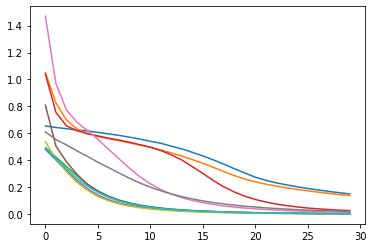

In [52]:
# iterating to find the best hidden parameter, train and test the model to find the best accuracies:

n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=model_train(net,trainloader)
    
print(storage)

In [64]:
#Better to take the largest no. of hidden nodes for good computation:
start_time_best=time.time()
model_best=One_hidden(10) # best parameter
model_train(model_best,mainloader)
end_time_best=time.time()
print(f"Training time: {end_time_best-start_time_best}s") # training time

Epoch [1/20], Loss: 0.49642
Epoch [2/20], Loss: 0.06794
Epoch [3/20], Loss: 0.07186
Epoch [4/20], Loss: 0.23103
Epoch [5/20], Loss: 0.10879
Epoch [6/20], Loss: 0.00257
Epoch [7/20], Loss: 0.00310
Epoch [8/20], Loss: 0.03676
Epoch [9/20], Loss: 0.00180
Epoch [10/20], Loss: 0.01946
Epoch [11/20], Loss: 0.00233
Epoch [12/20], Loss: 0.01456
Epoch [13/20], Loss: 0.00029
Epoch [14/20], Loss: 0.03122
Epoch [15/20], Loss: 0.00873
Epoch [16/20], Loss: 0.00411
Epoch [17/20], Loss: 0.01046
Epoch [18/20], Loss: 0.00026
Epoch [19/20], Loss: 0.00102
Epoch [20/20], Loss: 0.00420
Accuracy of the network for val data: 100.0 %
Training time: 1.3472719192504883s


In [63]:
accuracy(net_besT,testloader) #final accuracy

Accuracy of the network for val data: 100.0 %


100.0